In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


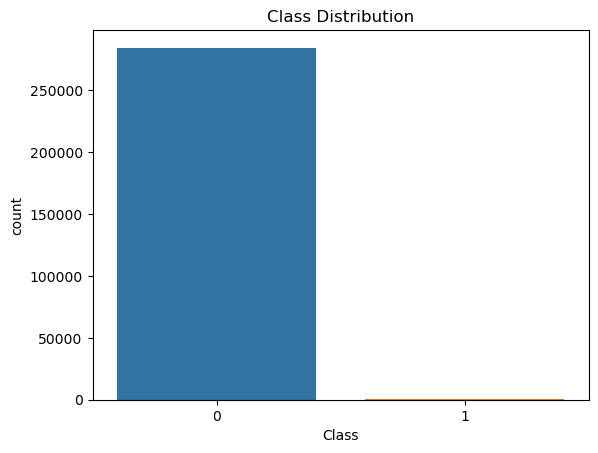

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

 
fraud_ratio = df['Class'].value_counts(normalize=True) * 100
print(fraud_ratio)

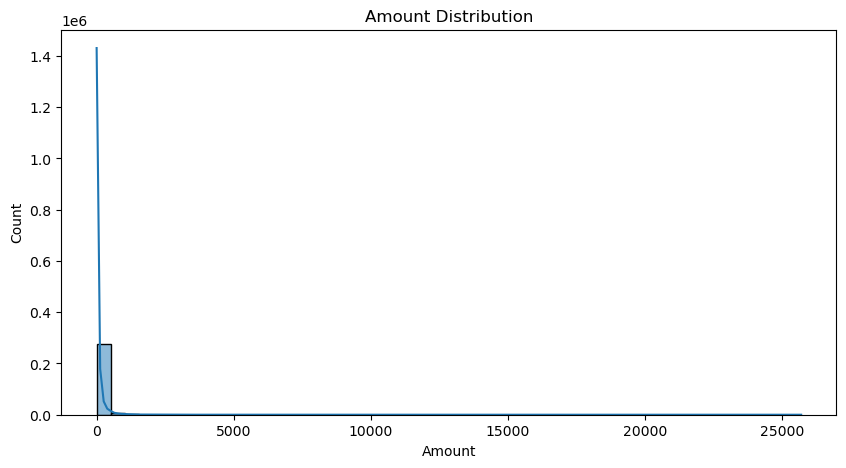

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Amount Distribution")
plt.show()

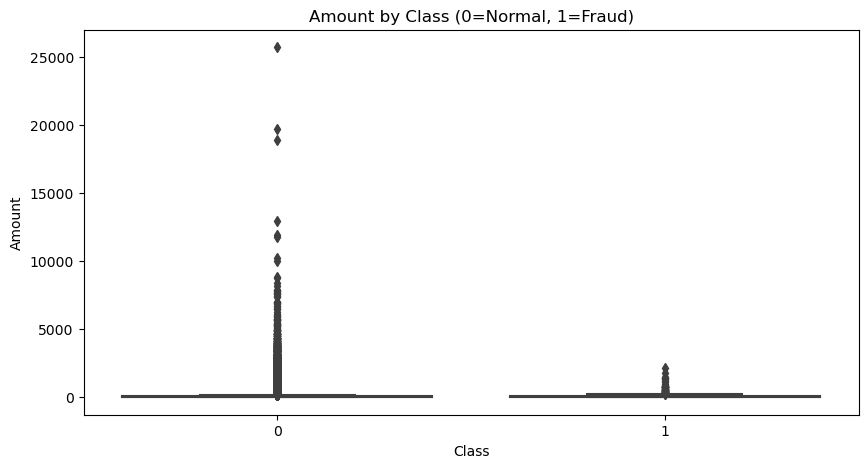

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount by Class (0=Normal, 1=Fraud)")
plt.show()

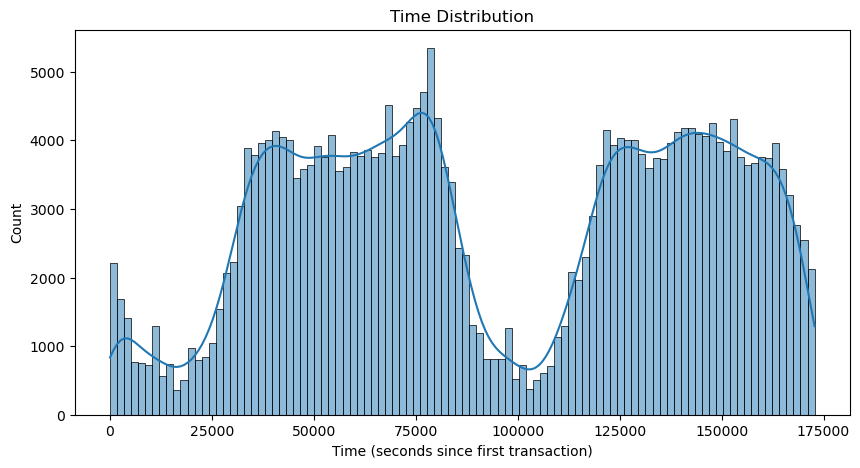

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df['Time'], bins=100, kde=True)
plt.title("Time Distribution")
plt.xlabel("Time (seconds since first transaction)")
plt.show()

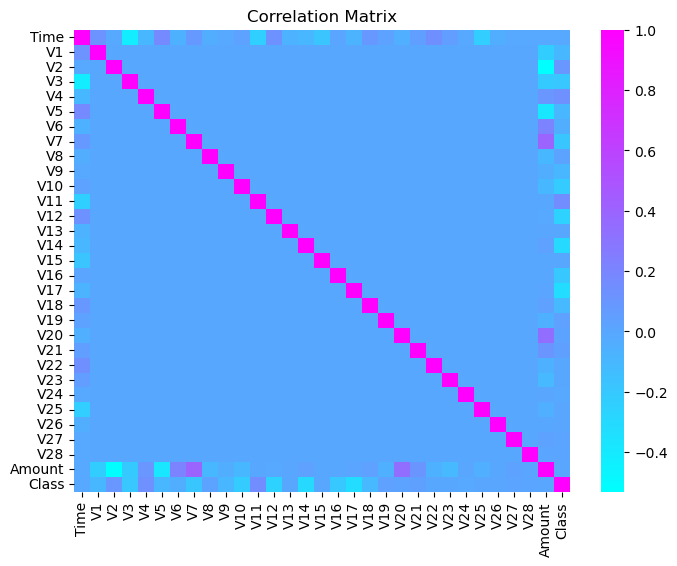

In [9]:
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, cmap='cool', annot=False)
plt.title("Correlation Matrix")
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
 
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

 
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Model
rf_sm = RandomForestClassifier(random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)

# Predict and Evaluate
y_pred_sm = rf_sm.predict(X_test)
print(confusion_matrix(y_test, y_pred_sm))
print(classification_report(y_test, y_pred_sm, digits=4))

[[56846    18]
 [   19    79]]
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8144    0.8061    0.8103        98

    accuracy                         0.9994     56962
   macro avg     0.9070    0.9029    0.9050     56962
weighted avg     0.9993    0.9994    0.9993     56962



In [13]:
# Get class weights
cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
cw_dict = dict(enumerate(cw))

# Model
rf_cw = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_cw.fit(X_train, y_train)

# Predict and Evaluate
y_pred_cw = rf_cw.predict(X_test)
print(confusion_matrix(y_test, y_pred_cw))
print(classification_report(y_test, y_pred_cw, digits=4))

[[56861     3]
 [   24    74]]
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9610    0.7551    0.8457        98

    accuracy                         0.9995     56962
   macro avg     0.9803    0.8775    0.9227     56962
weighted avg     0.9995    0.9995    0.9995     56962



In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

   
def evaluate_model(name, y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{name} Results:")
    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1-score: {f1:.4f}")
    return [name, precision, recall, f1]

#results    
results = []
results.append(evaluate_model("SMOTE", y_test, y_pred_sm))
results.append(evaluate_model("Class Weights", y_test, y_pred_cw))

      
results_df = pd.DataFrame(results, columns=["Method", "Precision", "Recall", "F1-Score"])
results_df.set_index("Method", inplace=True)



SMOTE Results:
Precision: 0.8144 | Recall: 0.8061 | F1-score: 0.8103

Class Weights Results:
Precision: 0.9610 | Recall: 0.7551 | F1-score: 0.8457


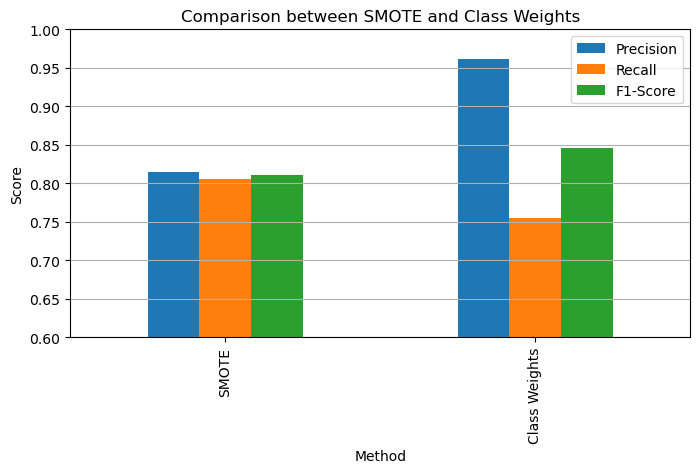

In [16]:
results_df.plot(kind='bar', figsize=(8,4), ylim=(0.6, 1), title="Comparison between SMOTE and Class Weights")
plt.ylabel("Score")
plt.grid(axis='y')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression

# SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Model
lr_sm = LogisticRegression(max_iter=1000)
lr_sm.fit(X_train_sm, y_train_sm)

# Predict & Evaluate
y_pred_lr_sm = lr_sm.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr_sm))
print(classification_report(y_test, y_pred_lr_sm, digits=4))

[[55406  1458]
 [    8    90]]
              precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962



In [18]:
# Model
lr_cw = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_cw.fit(X_train, y_train)

# Predict & Evaluate
y_pred_lr_cw = lr_cw.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr_cw))
print(classification_report(y_test, y_pred_lr_cw, digits=4))

[[55475  1389]
 [    8    90]]
              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0609    0.9184    0.1141        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962



In [19]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 682.7 kB/s eta 0:03:40
   ---------------------------------------- 0.1/150.0 MB 660.6 kB/s eta 0:03:47
   ---------------------------------------- 0.1/150.0 MB 901.1 kB/s eta 0:02:47
   ---------------------------------------- 0.2/150.0 MB 1.1 MB/s eta 0:02:12
   ---------------------------------------- 0.3/150.0 MB 1.4 MB/s eta 0:01:50
   ---------------------------------------- 0.4/150.0 MB 1.4 MB/s eta 0:01:45
   ---------------------------------------- 0.5/150.0 MB 1.5 MB/s eta 0:01:40
   ---------------------------------------- 0.6/150.0 MB 1.5 MB/s eta 0:01:38
   ---------------------------------------- 0.6/150.0 MB 1.6 MB/s eta 0:01:36
   -------------

In [20]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

# SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Model
xgb_sm = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_sm.fit(X_train_sm, y_train_sm)

# Evaluation
y_pred_sm = xgb_sm.predict(X_test)
print("XGBoost + SMOTE")
print(confusion_matrix(y_test, y_pred_sm))
print(classification_report(y_test, y_pred_sm, digits=4))

C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:28:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost + SMOTE
[[56832    32]
 [   11    87]]
              precision    recall  f1-score   support

           0     0.9998    0.9994    0.9996     56864
           1     0.7311    0.8878    0.8018        98

    accuracy                         0.9992     56962
   macro avg     0.8654    0.9436    0.9007     56962
weighted avg     0.9993    0.9992    0.9993     56962



In [21]:
from sklearn.utils import class_weight
import numpy as np

# Class Weights
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
cw_dict = dict(zip(np.unique(y_train), weights))

# Model
xgb_cw = XGBClassifier(scale_pos_weight=cw_dict[1], use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_cw.fit(X_train, y_train)

# Evaluation
y_pred_cw = xgb_cw.predict(X_test)
print("XGBoost + Class Weights")
print(confusion_matrix(y_test, y_pred_cw))
print(classification_report(y_test, y_pred_cw, digits=4))

C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:29:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost + Class Weights
[[56850    14]
 [   16    82]]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8542    0.8367    0.8454        98

    accuracy                         0.9995     56962
   macro avg     0.9269    0.9182    0.9225     56962
weighted avg     0.9995    0.9995    0.9995     56962



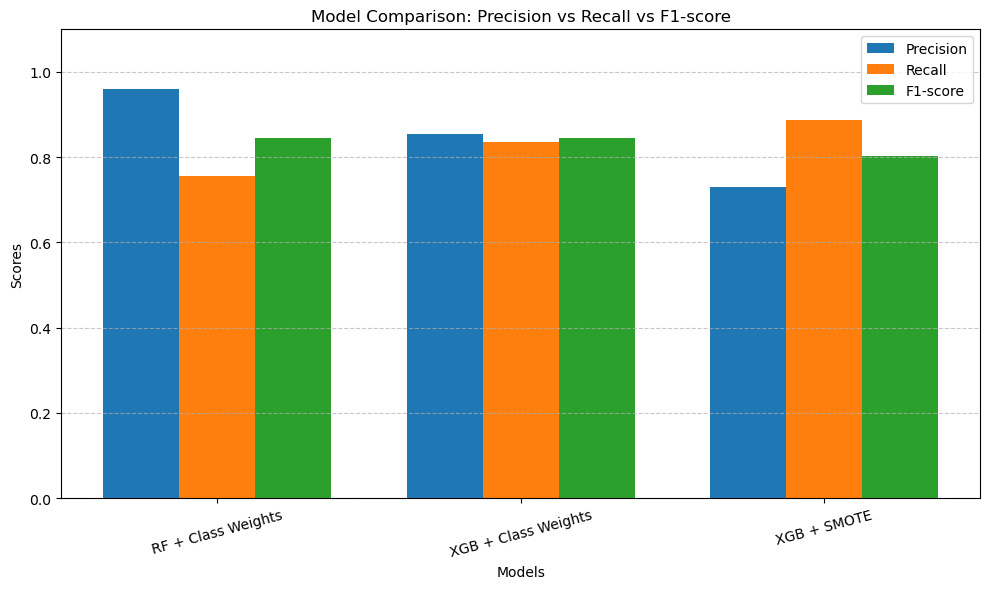

In [22]:
import matplotlib.pyplot as plt
import numpy as np

    
models = [
    "RF + Class Weights",
    "XGB + Class Weights",
    "XGB + SMOTE"
]

precision = [0.9610, 0.8542, 0.7311]
recall    = [0.7551, 0.8367, 0.8878]
f1_score  = [0.8457, 0.8454, 0.8018]

         
x = np.arange(len(models))
width = 0.25         

   
plt.figure(figsize=(10,6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1-score')

  
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Model Comparison: Precision vs Recall vs F1-score")
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

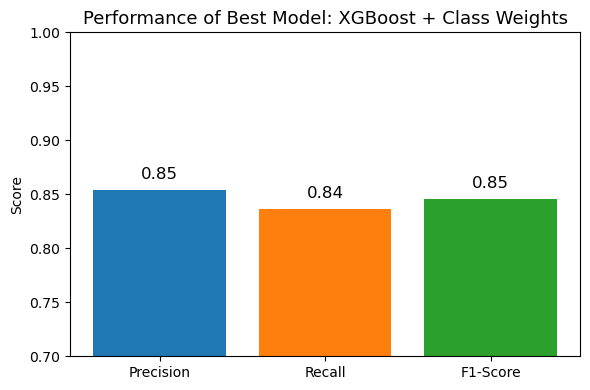

In [27]:
import matplotlib.pyplot as plt

# Metrics for best model (XGBoost + Class Weights)
metrics = {
    'Precision': 0.8542,
    'Recall': 0.8367,
    'F1-Score': 0.8454
}

# Plotting
plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.ylim(0.7, 1.0)
plt.title("Performance of Best Model: XGBoost + Class Weights", fontsize=13)
plt.ylabel("Score")
for i, (metric, value) in enumerate(metrics.items()):
    plt.text(i, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()


In [24]:
import joblib

# model هو موديل XGBoost المدرب بـ class weights
joblib.dump(xgb_cw, "xgboost_fraud_model.pkl")

['xgboost_fraud_model.pkl']

In [25]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [26]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# ----------------------------
# 1.model  
# ----------------------------
model = joblib.load("xgboost_fraud_model.pkl")
scaler = joblib.load("scaler.pkl")

# ----------------------------
# 2.X_test (10%)
# ----------------------------
X_unused, X_new, y_unused, y_new = train_test_split(X_test, y_test, test_size=0.1, random_state=7, stratify=y_test)
 
y_new_pred = model.predict(X_new)

# ----------------------------
# 5.Evaluation          
# ----------------------------
print("🔍 Evaluation on New (Unseen) Data:")
print(confusion_matrix(y_new, y_new_pred))
print(classification_report(y_new, y_new_pred, digits=4))


🔍 Evaluation on New (Unseen) Data:
[[5684    3]
 [   0   10]]
              precision    recall  f1-score   support

           0     1.0000    0.9995    0.9997      5687
           1     0.7692    1.0000    0.8696        10

    accuracy                         0.9995      5697
   macro avg     0.8846    0.9997    0.9347      5697
weighted avg     0.9996    0.9995    0.9995      5697

